# CAR PRICE PREDICTION


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [2]:
df=pd.read_csv("data.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.shape

(205, 26)

In [4]:
df['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

In [5]:

df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

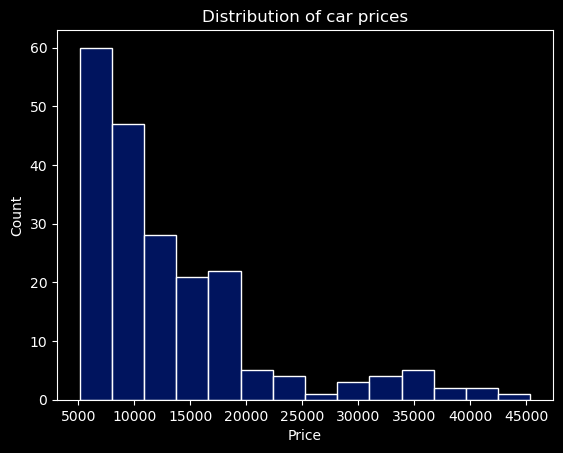

In [6]:
plt.style.use('dark_background')
sns.set_palette('dark')
sns.histplot(df['price'])
plt.title('Distribution of car prices',color='white')
plt.xlabel('Price',color='white')
plt.ylabel('Count',color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

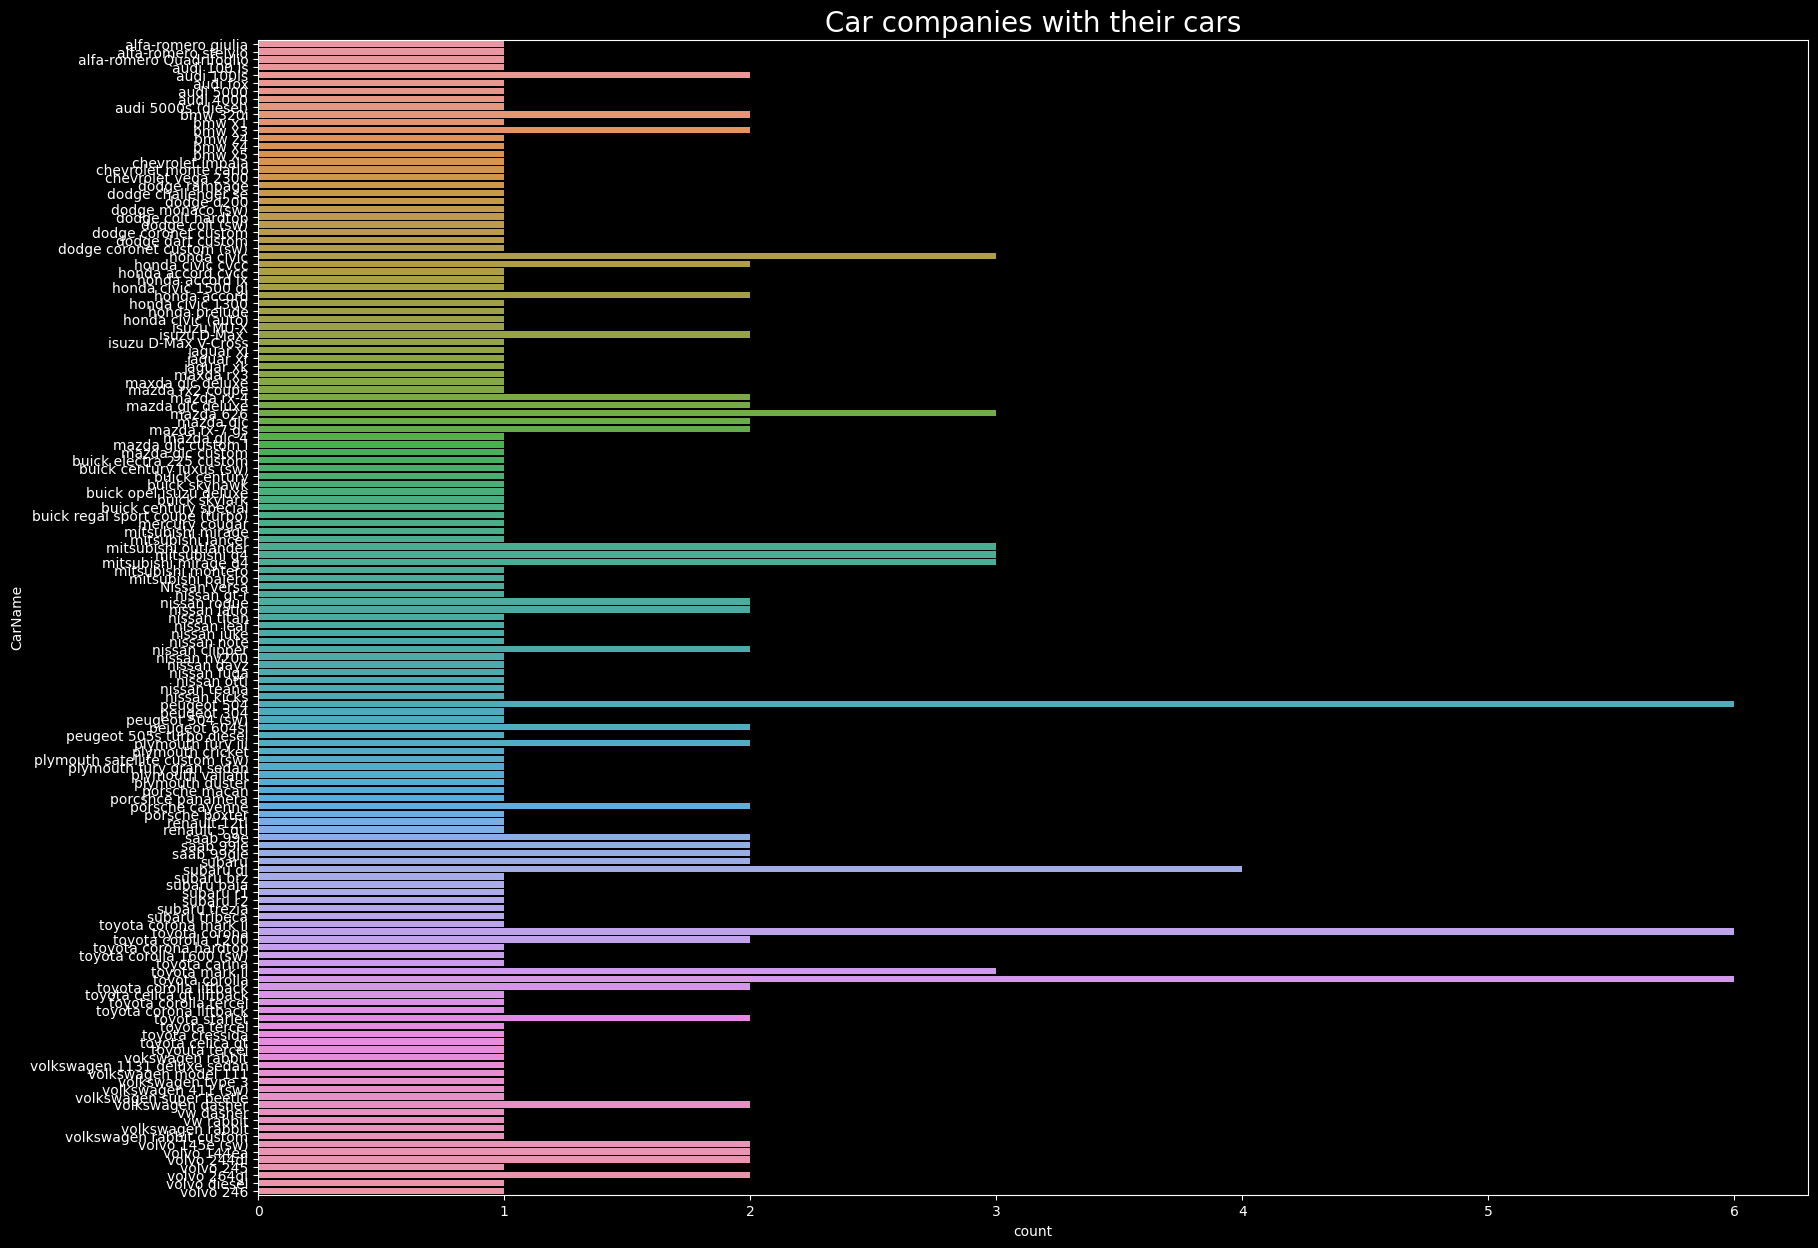

In [7]:
plt.figure(figsize = (20, 15))
sns.countplot(y = df.CarName)
plt.title("Car companies with their cars", fontsize = 20)
plt.show()

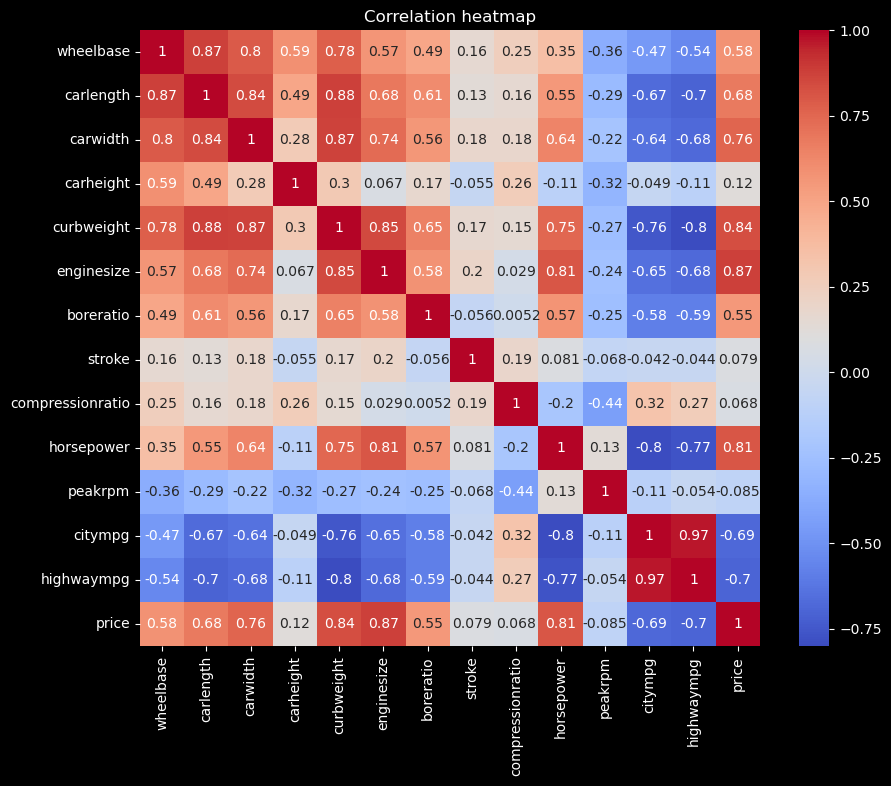

In [8]:
numeric_features=['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke',
                 'compressionratio','horsepower','peakrpm','citympg','highwaympg','price']
correlation_matrix=df[numeric_features].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation heatmap',color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

Text(0, 0.5, 'Count of cars')

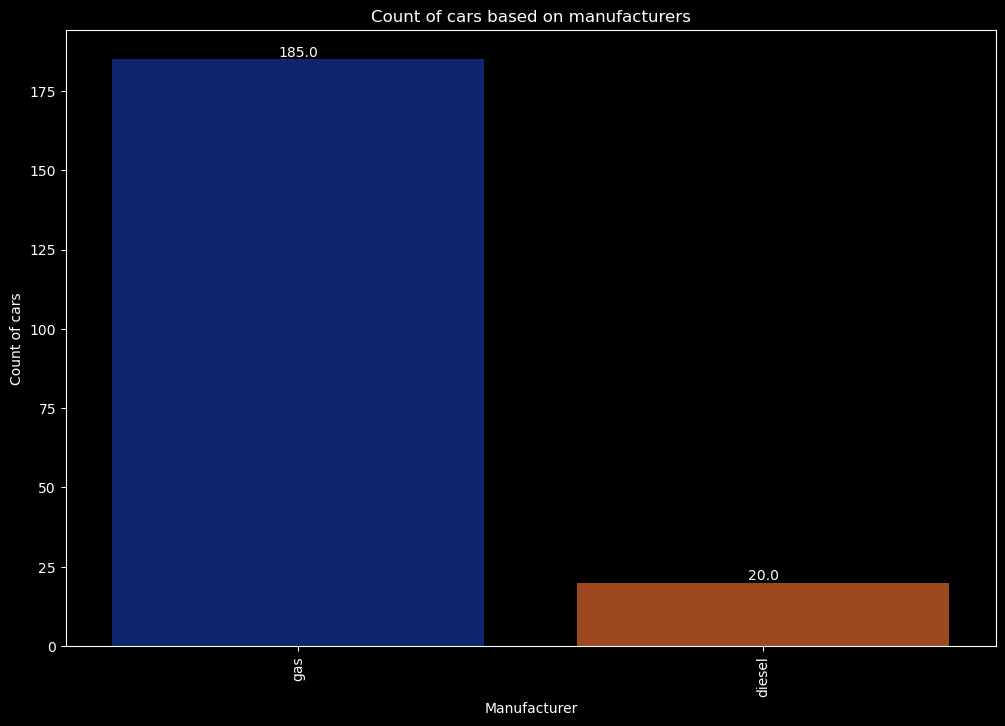

In [9]:
plt.figure(figsize = (12, 8))
plot = sns.countplot(x = 'fueltype', data = df)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(),
                        (p.get_x() + p.get_width() / 2.0,
                         p.get_height()),
                        ha = 'center',
                        va = 'center',
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Count of cars")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [11]:
print(df['fueltype'].unique())
print(df['doornumber'].unique())
print(df['carbody'].unique())


['gas' 'diesel']
['two' 'four']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']


In [12]:
df.drop("aspiration", axis = 1, inplace = True)
df.drop("symboling", axis = 1, inplace = True)


In [13]:
df

,car_ID,CarName,fueltype,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,alfa-romero giulia,gas,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,alfa-romero stelvio,gas,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,alfa-romero Quadrifoglio,gas,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,audi 100 ls,gas,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,audi 100ls,gas,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,volvo 145e (sw),gas,four,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,volvo 144ea,gas,four,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,volvo 244dl,gas,four,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,volvo 246,diesel,four,sedan,rwd,front,109.1,188.8,68.9,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [14]:
df.dtypes

car_ID                int64
CarName              object
fueltype             object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [15]:
feature_columns = df.drop('price', axis=1)
target_column='price'
X=feature_columns
y=df[target_column]

In [17]:
label_encoder=LabelEncoder()
for col in X.columns:
    if X[col].dtype =='object':
        X[col] = label_encoder.fit_transform(X[col])
        

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [21]:
y_pred_LR = model.predict(X_test)
print("Accuracy on Traing set: ",model.score(X_train,y_train))
print("Accuracy on Testing set: ",model.score(X_test,y_test))

Accuracy on Traing set:  0.9091218450117955
Accuracy on Testing set:  0.8469066659577514


In [22]:
predictions=model.predict(X_test)
mse=mean_squared_error(y_test,predictions)
rmse=np.sqrt(mse)
print('Root Mean Squared Error:',rmse)

Root Mean Squared Error: 3476.4642036367463


In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)

y_pred_rf = random_forest_model.predict(X_test)


print("Accuracy on Traing set: ",random_forest_model.score(X_train,y_train))
print("Accuracy on Testing set: ",random_forest_model.score(X_test,y_test))
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor:")
print(f"Mean Squared Error: {mse_rf:.2f}")
print(f"Mean Absolute Error: {mae_rf:.2f}")
print(f"R-squared: {r2_rf:.2f}")

Accuracy on Traing set:  0.9863312992019851
Accuracy on Testing set:  0.9557819564913977
Random Forest Regressor:
Mean Squared Error: 3490750.15
Mean Absolute Error: 1309.74
R-squared: 0.96


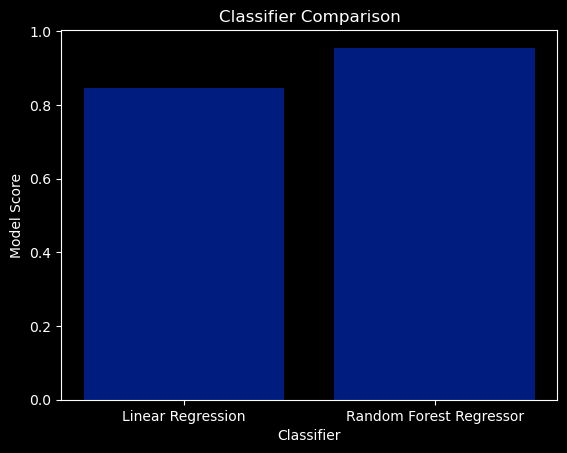

In [24]:
pred_models = [model.score(X_test,y_test),random_forest_model.score(X_test,y_test) ]
plt.bar(['Linear Regression', 'Random Forest Regressor'],pred_models)
plt.xlabel('Classifier')
plt.ylabel('Model Score')
plt.title('Classifier Comparison')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_14764\4234489362.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-y_pred_rf),bins=50)


<Axes: xlabel='price', ylabel='Density'>

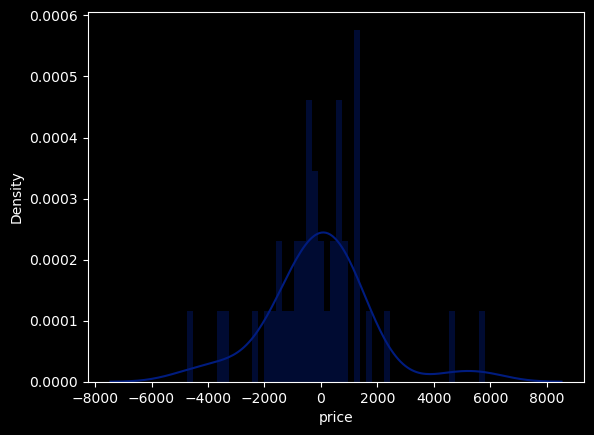

In [25]:
fig = plt.figure()
sns.distplot((y_test-y_pred_rf),bins=50)

C:\Users\Admin\AppData\Local\Temp\ipykernel_14764\1164752214.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50)


<Axes: xlabel='price', ylabel='Density'>

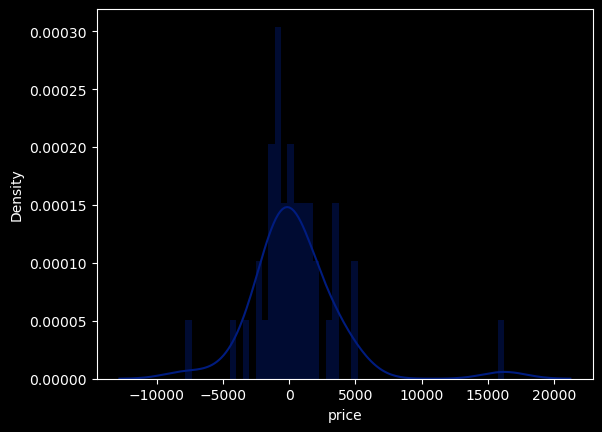

In [26]:
fig = plt.figure()
sns.distplot((y_test-predictions),bins=50)

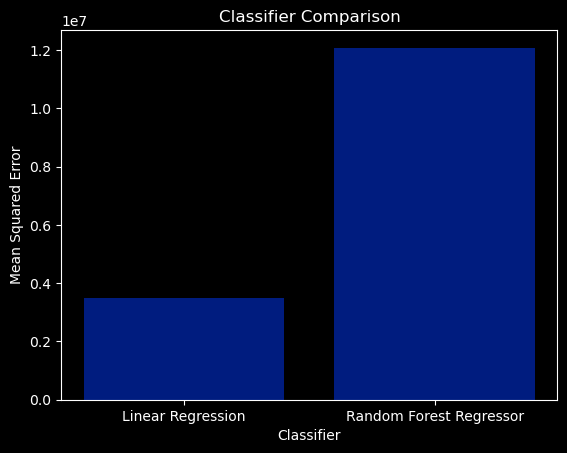

In [27]:
mse_result = [mse_rf,mse]

plt.bar(['Linear Regression', 'Random Forest Regressor'],mse_result)
plt.xlabel('Classifier')
plt.ylabel('Mean Squared Error')
plt.title('Classifier Comparison')
plt.show()

In [28]:
df.columns

Index(['car_ID', 'CarName', 'fueltype', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [30]:
df


,car_ID,CarName,fueltype,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,alfa-romero giulia,gas,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,alfa-romero stelvio,gas,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,alfa-romero Quadrifoglio,gas,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,audi 100 ls,gas,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,audi 100ls,gas,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,volvo 145e (sw),gas,four,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,volvo 144ea,gas,four,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,volvo 244dl,gas,four,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,volvo 246,diesel,four,sedan,rwd,front,109.1,188.8,68.9,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [143]:
import pandas as pd
new_car_data = [[1, 'alfa-romero giulia', 'gas', 'two', 'convertible', 'rwd', 'front',
              88.6, 168.8, 64.1, 48.8, 2548, 'dohc', 'four', 130, 'mpfi', 3.47, 2.68, 9.0, 111, 5000, 21, 27]]

new_car_columns = ['car_ID',  'CarName', 'fueltype', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
                   'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
                   'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
                   'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']

new_car_df = pd.DataFrame(new_car_data, columns=new_car_columns)
new_car_df.drop(columns=['CarName'], inplace=True)
new_car_encoded = pd.get_dummies(new_car_df, drop_first=True)
new_car_encoded = new_car_encoded.reindex(columns=X_train.columns, fill_value=0)

predicted_price =random_forest_model.predict(new_car_encoded)
predicted_price = max(1000, predicted_price) 
print('Predicted_price:', predicted_price)


Predicted_price: [34750.57]


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
